In [1]:
import pandas as pd
pd.set_option("display.max_columns", 150)
import glob
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
cb = pd.read_csv('../data/citibike_vis.csv')
cb = cb.drop(columns = 'Unnamed: 0') #dropping extra column
cb = cb.sort_values('date').reset_index(drop = True) #sorting the values by date and resetting index.


In [3]:
#changing columns to datetime.
cb['date'] = pd.to_datetime(cb['date'])
cb['year'] = pd.to_datetime(cb['date']).dt.year
cb['month'] = pd.to_datetime(cb['date']).dt.month
cb['day_of_week'] = cb['day_of_week'].astype(str) #changing the day of week column to string.

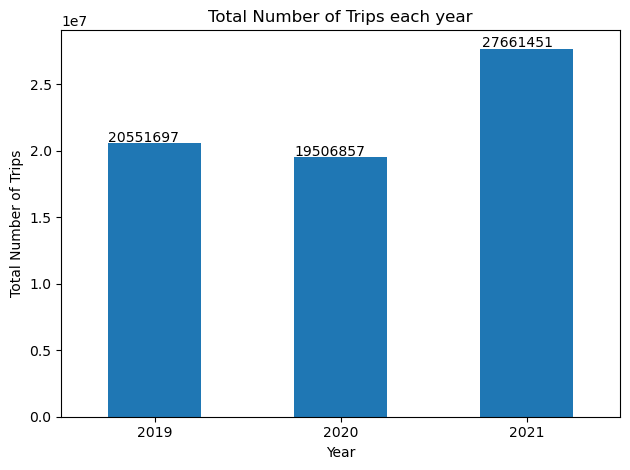

In [13]:
cb.groupby('year')['num_of_trips'].sum().plot.bar()

plt.title('Total Number of Trips each year')
plt.xlabel('Year')
plt.ylabel('Total Number of Trips')
plt.xticks(rotation=0)
plt.tight_layout()

ax = plt.gca()

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.savefig('../photos/total_trips.png', bbox_inches='tight')    
plt.show()


In [12]:
 cb['num_of_trips'].sum()

67720005

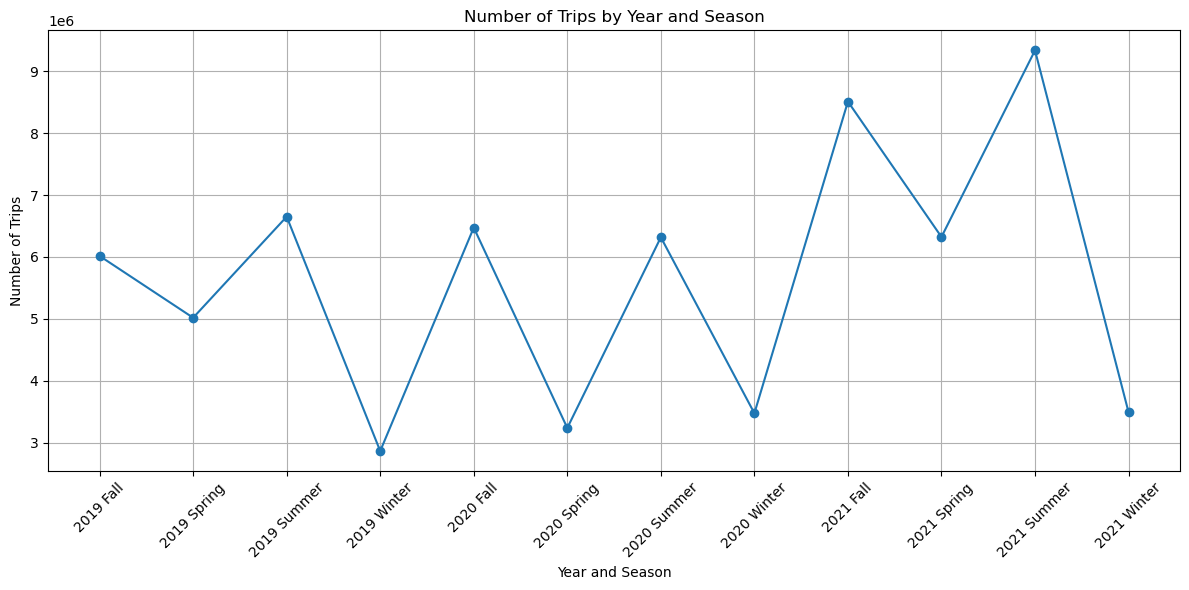

In [13]:
season_year = cb.groupby(['year', 'season'])['num_of_trips'].sum().reset_index()

season_year['year_season'] = season_year['year'].astype(str) + ' ' + season_year['season']

plt.figure(figsize=(12, 6))
plt.plot(season_year['year_season'], season_year['num_of_trips'], marker='o', linestyle='-')

plt.xlabel('Year and Season')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Year and Season')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  
plt.show()

In [ ]:
season_year = cb.groupby(['year', 'season'])['num_of_trips'].sum().reset_index()

season_year['year_season'] = season_year['year'].astype(str) + ' ' + season_year['season']

plt.figure(figsize=(12, 6))
plt.plot(season_year['year_season'], season_year['num_of_trips'], marker='o', linestyle='-')

plt.xlabel('Year and Season')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Year and Season')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  
plt.show()

In [15]:
cb.columns

Index(['date', 'num_of_trips', 'holiday', 'prcp', 'snow', 'tmax', 'tmin',
       'median_trip_duration', 'mean_trip_duration', 'day_of_week', 'year',
       'month', 'season'],
      dtype='object')

In [14]:
# cb.to_csv('../data/cb_stream.csv')